In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getDf():
    files = {}
    for size in [1000000, 2000000, 3000000, 4000000]:
        with open("../result/resultTreeAggregate_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size1000000']
    for s in [2000000, 3000000, 4000000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str, "size": int, "partnumber": int, "method": str, "aggtime":int, "accesstime": int})
    return data

In [3]:
df = getDf()

In [4]:
df_avg = df.groupby(["size", "partnumber","method"]).mean().reset_index()

In [5]:
df_avg

,size,partnumber,method,aggtime,accesstime
0,1000000,7,"""copy""",12617591.2,9943.8
1,1000000,7,"""shared""",10008176.0,10382.0
2,1000000,31,"""copy""",12093534.0,10675.2
3,1000000,31,"""shared""",11044537.8,11008.8
4,1000000,127,"""copy""",11864413.2,10923.4
5,1000000,127,"""shared""",11542443.6,11274.6
6,1000000,511,"""copy""",13456573.4,10960.2
7,1000000,511,"""shared""",11709752.4,11371.6
8,1000000,2047,"""copy""",15477033.2,11000.0
9,1000000,2047,"""shared""",12115513.0,11414.0


In [6]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

In [7]:
df_avg[(df_avg["method"] == '"copy"') & (df_avg["partnumber"] == 7)]

,size,partnumber,method,aggtime,accesstime
0,1000000,7,"""copy""",12617591.2,9943.8
12,2000000,7,"""copy""",27916513.0,20096.4
24,3000000,7,"""copy""",40198003.4,30321.2
36,4000000,7,"""copy""",54338126.0,40167.4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


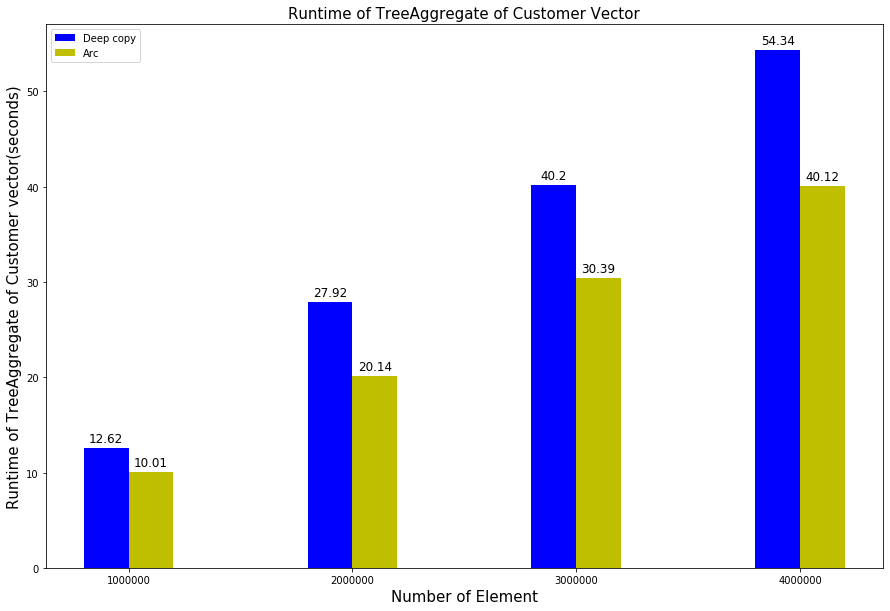

In [20]:
copy = df_avg[(df_avg["method"] == '"copy"') & (df_avg["partnumber"] == 7)]
shared = df_avg[(df_avg["method"] == '"shared"') & (df_avg["partnumber"] == 7)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w / 2, round(copy["aggtime"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(shared["aggtime"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Runtime of TreeAggregate of Customer vector(seconds)", fontsize = 15)
ax.set_title("Runtime of TreeAggregate of Customer Vector", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
fig.savefig("rust_tree_aggregate.eps")
plt.show()

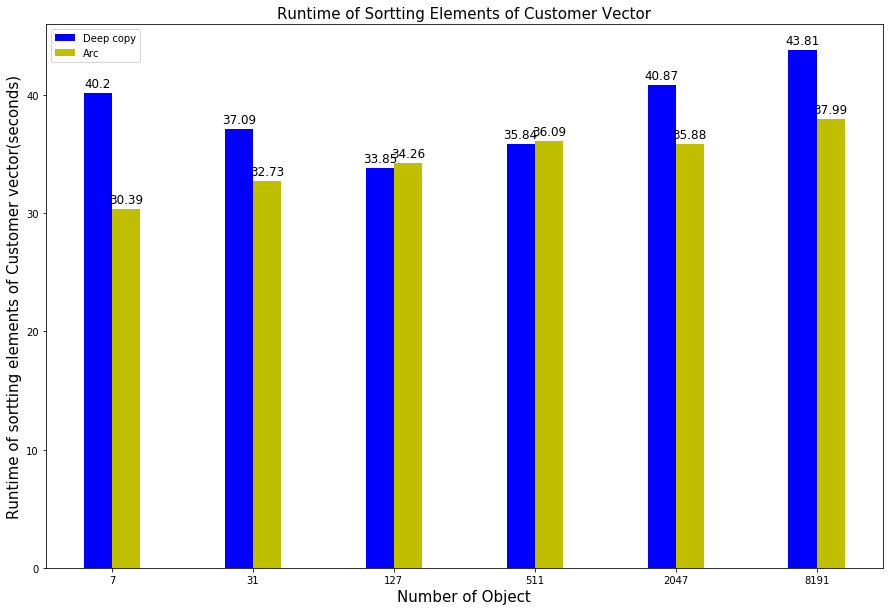

In [23]:
copy = df_avg[(df_avg["method"] == '"copy"') & (df_avg["size"] == 3000000)]
shared = df_avg[(df_avg["method"] == '"shared"') & (df_avg["size"] == 3000000)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['partnumber'].nunique())
b1 = ax.bar(idx - w / 2, round(copy["aggtime"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(shared["aggtime"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(df_avg['partnumber'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object", fontsize = 15)
ax.set_ylabel("Runtime of sortting elements of Customer vector(seconds)", fontsize = 15)
ax.set_title("Runtime of Sortting Elements of Customer Vector", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_merge_sort.eps")
plt.show()

In [52]:
def f(k):
    res = 0;
    for i in range(k + 1):
        res += 2 ** i
    return res